# Análise inicial dos dados

In [1]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc = {'figure.figsize' : (20, 6)})

from sklearn.ensemble import RandomForestRegressor

# Importação dos dados para análise
raw_data = pd.read_csv('data/archive.zip', 
                       sep = ',',
                       decimal = ',')

raw_data.head() # Exibe  as primeiras linhas do dataframe

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [2]:
raw_data.shape # Número de linhas e colunas do dataframe

(737453, 24)

In [3]:
raw_data.describe().transpose() # Exploração inicial do comportamento dos dados

,count,mean,std,min,25%,50%,75%,max
% Iron Feed,737453.0,56.294739,5.157744,42.740000,52.670000,56.080000,59.720000,65.78000
% Silica Feed,737453.0,14.651716,6.807439,1.310000,8.940000,13.850000,19.600000,33.40000
Starch Flow,737453.0,2869.140569,1215.203734,0.002026,2076.320000,3018.430000,3727.730000,6300.23000
Amina Flow,737453.0,488.144697,91.230534,241.669000,431.796000,504.393000,553.257000,739.53800
Ore Pulp Flow,737453.0,397.578372,9.699785,376.249000,394.264000,399.249000,402.968000,418.64100
Ore Pulp pH,737453.0,9.767639,0.387007,8.753340,9.527360,9.798100,10.038000,10.80810
Ore Pulp Density,737453.0,1.680380,0.069249,1.519820,1.647310,1.697600,1.728330,1.85325
Flotation Column 01 Air Flow,737453.0,280.151856,29.621288,175.510000,250.281000,299.344000,300.149000,373.87100
Flotation Column 02 Air Flow,737453.0,277.159965,30.149357,175.156000,250.457000,296.223000,300.690000,375.99200
Flotation Column 03 Air Flow,737453.0,281.082397,28.558268,176.469000,250.855000,298.696000,300.382000,364.34600


In [4]:
raw_data.isnull().sum() # Validação da existência de dados nulos

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [5]:
raw_data.groupby(raw_data['date']).count() # Agrupamento para entendimento do comportamento dos dados

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,174,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174
2017-03-10 02:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-03-10 03:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-03-10 04:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-03-10 05:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-09-09 20:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-09-09 21:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180


In [6]:
(raw_data.drop('date', axis = 'columns').diff() != 0).sum() # Avaliação da frequência de atualização dos dados

% Iron Feed                        307
% Silica Feed                      306
Starch Flow                     729203
Amina Flow                      727488
Ore Pulp Flow                   732400
Ore Pulp pH                     713041
Ore Pulp Density                715814
Flotation Column 01 Air Flow    698973
Flotation Column 02 Air Flow    730617
Flotation Column 03 Air Flow    708892
Flotation Column 04 Air Flow    636351
Flotation Column 05 Air Flow    645548
Flotation Column 06 Air Flow    705541
Flotation Column 07 Air Flow    717706
Flotation Column 01 Level       723840
Flotation Column 02 Level       731636
Flotation Column 03 Level       730954
Flotation Column 04 Level       734148
Flotation Column 05 Level       731895
Flotation Column 06 Level       733526
Flotation Column 07 Level       732756
% Iron Concentrate               42308
% Silica Concentrate             59141
dtype: int64

In [7]:
# Avaliando a frequência com que a medida de sílica no concentrado é alterada 
concentrate_changes = raw_data[['% Silica Concentrate', '% Iron Concentrate']].diff() != 0
concentrate_changes_index = concentrate_changes[concentrate_changes['% Silica Concentrate'] == True].index
concentrate_changes_index = concentrate_changes_index.to_series()
concentrate_changes_index

0              0
174          174
354          354
534          534
714          714
           ...  
736553    736553
736733    736733
736913    736913
737093    737093
737273    737273
Length: 59141, dtype: int64

In [8]:
concentrate_changes_index.diff().describe() # Avaliação do comportamento da diferença entre os pontos

count    59140.000000
mean        12.466571
std         86.988746
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      13140.000000
dtype: float64

In [9]:
np.sum([concentrate_changes_index.diff() == 1]) # Existem 55.800 pontos nos quais varia de 20 em 20 s

55800

In [10]:
55800*20/3600 # Total de horas em que houve variação a cada ponto de dados
# Como há apenas 310 ocorrências, não filtrarei estes pontos

310.0

In [11]:
concentrate_changes_index.diff()[concentrate_changes_index.diff() != 1].describe() 
# Ignorando os pontos nos quais há diferença a cada 20s, podemos ver uma tendência de mudança na concentração a cada 180 pontos (180*20/3600 = 1 hora)

count     3340.000000
mean       204.033832
std        308.412163
min        174.000000
25%        180.000000
50%        180.000000
75%        180.000000
max      13140.000000
dtype: float64

In [12]:
# Visualização gráfica das variáveis na amostragem original (comentado devido ao tamanho)
# raw_data[['% Iron Feed', '% Silica Feed', '% Iron Concentrate', '% Silica Concentrate']].plot()
# raw_data[['Starch Flow', 'Amina Flow']].plot()
# raw_data[['Ore Pulp Flow']].plot()
# raw_data[['Ore Pulp pH']].plot()
# raw_data[['Ore Pulp Density']].plot()
# raw_data[[col for col in raw_data.columns if 'Level' in col]].plot()
# raw_data[[col for col in raw_data.columns if 'Air Flow' in col]].plot()

# Filtragem e preparação dos dados

In [13]:
# Função para criar um filtro que retorna True para períodos em que a variável se comporta normalmente e 
def create_filter_stuck_interp(data, vars, num_points, discrete = False):
    """
    Função para criar um filtro que retorna True para períodos em que a variável se comporta normalmente e False para momentos 
    em que a variável fica travada por um número de pontos maior que num_points ou que aparenta estar interpolada (variação linear constante)

    data : df
        Dataframe com os dados brutos
    vars : [str]
        Colunas do dataframe a serem utilizadas para criação do filtro
    num_points : int
        Número de pontos (tempo) para se considerar uma variável travada
    discrete : bool
        Indica se a variável é discreta (degraus) ou contínua 
    """
    changes = abs(data[vars] - data[vars].shift()) > 1e-12 # Identifica pontos nos quais houve mudança

    time_since_last_change = changes.mul(changes.index, axis = 0) # Utiliza o índice do dataframe para calcular quanto tempo se passou desde a última mudança
    time_since_last_change = time_since_last_change.replace(0, np.nan)
    time_since_last_change = time_since_last_change.ffill()
    time_since_last_change = time_since_last_change.fillna(0)
    time_since_last_change = abs(time_since_last_change.sub(time_since_last_change.index, axis = 0))

    filter = time_since_last_change < num_points # Remove pontos travados por mais de num_points

    if discrete == True:
        linear_variations = (time_since_last_change - time_since_last_change.shift()) == 0 # Identifica sequências de variações lineares (interpolações)
        filter[linear_variations == True] = False # Remove interpolações
    else:
        first_derivative = abs(data[vars] - data[vars].shift())
        second_derivative = abs(first_derivative - first_derivative.shift())
        mean_second_derivative = second_derivative.rolling(num_points).mean()
        linear_variations = mean_second_derivative < 1e-6 # Identifica interpolações em dados contínuos usando a segunda derivada muito próxima de zero
        filter[linear_variations == True] = False # Remove interpolações

    return filter

In [14]:
# Separação das variáveis conforme comportamento, para aplicação de filtros distintos
datetime_vars = ['date'] # Variável data/hora
online_vars = [column_name for column_name in raw_data.columns if ('%' not in column_name and 'date' not in column_name)] # Variáveis de amostragem "online", a cada 20s
feed_vars = [column_name for column_name in raw_data.columns if 'Feed' in column_name] # Concentrações da polpa, período irregular
concentrate_vars = [column_name for column_name in raw_data.columns if 'Concentrate' in column_name] # Concentrações do concentrado, a cada hora majoritariamente

In [15]:
concentrate_filter = create_filter_stuck_interp(raw_data, concentrate_vars, 3*60*8, discrete = True) # Filtro para concentração de saída considerando 1 turno travado (tentativa e erro)
feed_filter = create_filter_stuck_interp(raw_data, feed_vars, 3*60*16, discrete = True) # Filtro para concentração de entrada considerando 2 turnos travados (tentativa e erro)
online_filter = create_filter_stuck_interp(raw_data, online_vars, 3*60) # Filtro para variáveis online, considerando 1h travado

In [16]:
concentrate_filter.sum()/raw_data.shape[0]

% Iron Concentrate      0.899438
% Silica Concentrate    0.878202
dtype: float64

In [17]:
feed_filter.sum()/raw_data.shape[0]

% Iron Feed      0.644616
% Silica Feed    0.644616
dtype: float64

In [18]:
online_filter.sum()/raw_data.shape[0]

Starch Flow                     0.960416
Amina Flow                      0.961772
Ore Pulp Flow                   0.933192
Ore Pulp pH                     0.982114
Ore Pulp Density                0.944514
Flotation Column 01 Air Flow    0.980453
Flotation Column 02 Air Flow    0.977592
Flotation Column 03 Air Flow    0.979912
Flotation Column 04 Air Flow    0.639999
Flotation Column 05 Air Flow    0.645899
Flotation Column 06 Air Flow    0.990991
Flotation Column 07 Air Flow    0.992842
Flotation Column 01 Level       0.958762
Flotation Column 02 Level       0.949529
Flotation Column 03 Level       0.944988
Flotation Column 04 Level       0.967879
Flotation Column 05 Level       0.969250
Flotation Column 06 Level       0.963873
Flotation Column 07 Level       0.968140
dtype: float64

In [19]:
# Seta os dados fora do filtro como nan
clean_online_data = raw_data[online_vars].copy()
clean_online_data[online_filter == False] = np.nan

clean_concentrate_data = raw_data[concentrate_vars].copy()
clean_concentrate_data[concentrate_filter == False] = np.nan

clean_feed_data = raw_data[feed_vars].copy()
clean_feed_data[feed_filter == False] = np.nan

In [20]:
# Concatena todos os dataframes criados
clean_data = pd.concat([raw_data[datetime_vars], clean_online_data, clean_feed_data, clean_concentrate_data], axis = 1)

In [21]:
# Transformação dos dados em médias horárias, para melhor visualização e elaboração do modelo, considerando a amostragem da variável objetivo
hourly_data = clean_data.groupby(clean_data['date']).mean()

In [22]:
hourly_data.head()

,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,...,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Feed,% Silica Feed,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,3162.625026,578.786678,398.753368,10.113487,1.729558,251.166672,250.226086,250.178287,295.096,306.4,...,446.891845,450.474523,449.912259,455.792161,464.383310,450.532747,55.2,16.98,66.91,1.31
2017-03-10 02:00:00,3133.256389,537.219661,399.871822,10.129742,1.667784,249.880589,250.214050,250.033317,295.096,306.4,...,450.249356,450.081222,450.328806,448.722983,455.501528,451.387700,55.2,16.98,67.06,1.11
2017-03-10 03:00:00,3479.482944,591.906744,398.763806,10.048403,1.732711,250.161328,250.104167,250.046350,NaN,NaN,...,450.868711,450.901822,451.145822,451.134189,459.981311,450.296722,55.2,16.98,66.97,1.27
2017-03-10 04:00:00,3228.036436,593.170106,399.866983,9.918614,1.731056,250.208772,250.204761,250.120861,NaN,NaN,...,491.462111,487.387206,494.528183,495.664011,502.763850,494.939889,55.2,16.98,66.75,1.36
2017-03-10 05:00:00,3327.280739,619.710806,399.615089,9.746029,1.765879,249.917800,250.160494,250.013500,NaN,NaN,...,549.983156,549.459572,549.975483,549.512533,560.696300,550.271772,55.2,16.98,66.63,1.34


<Axes: xlabel='date'>

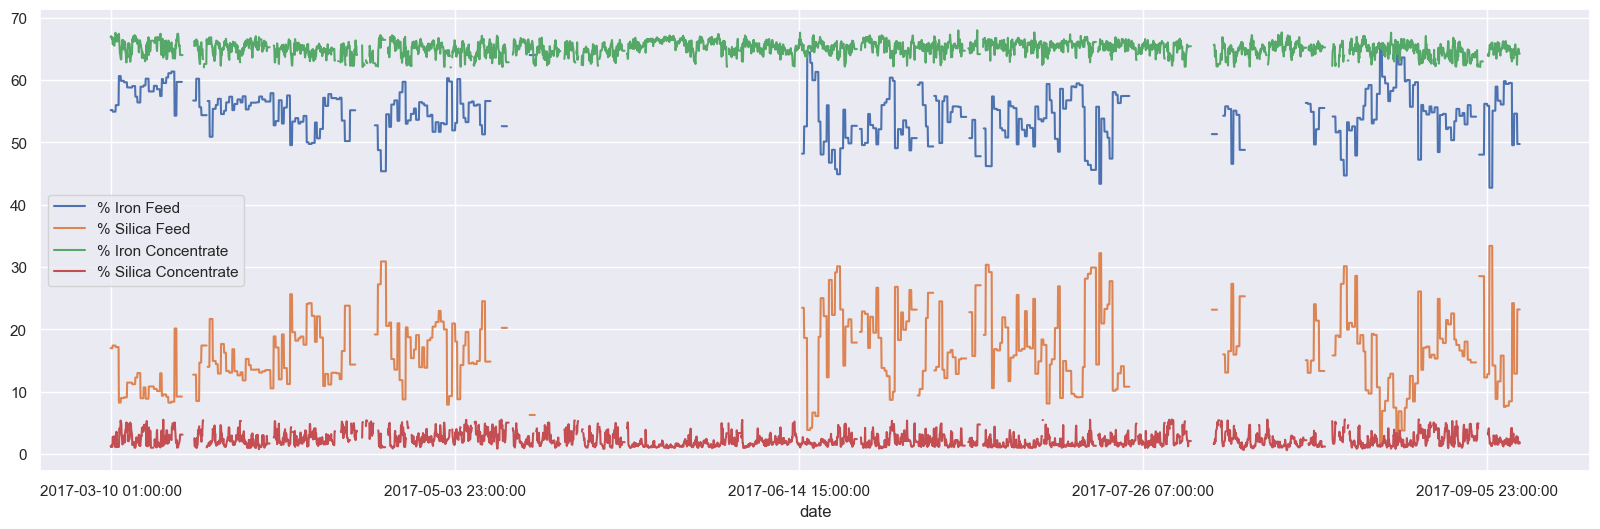

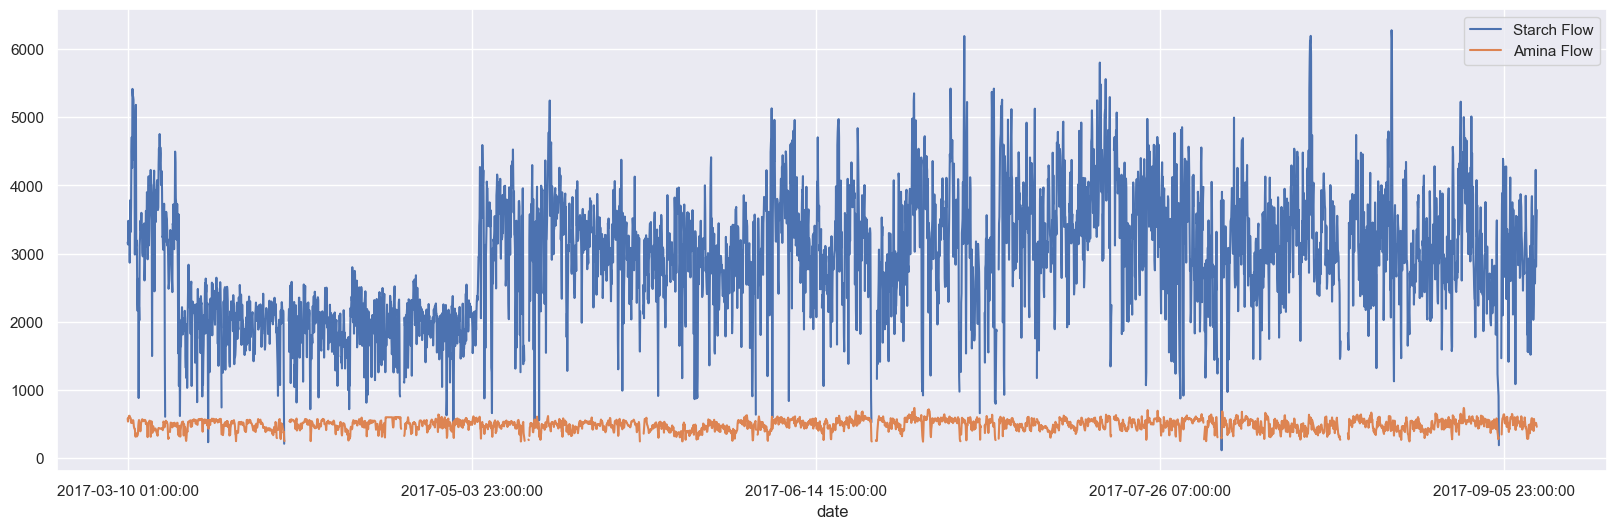

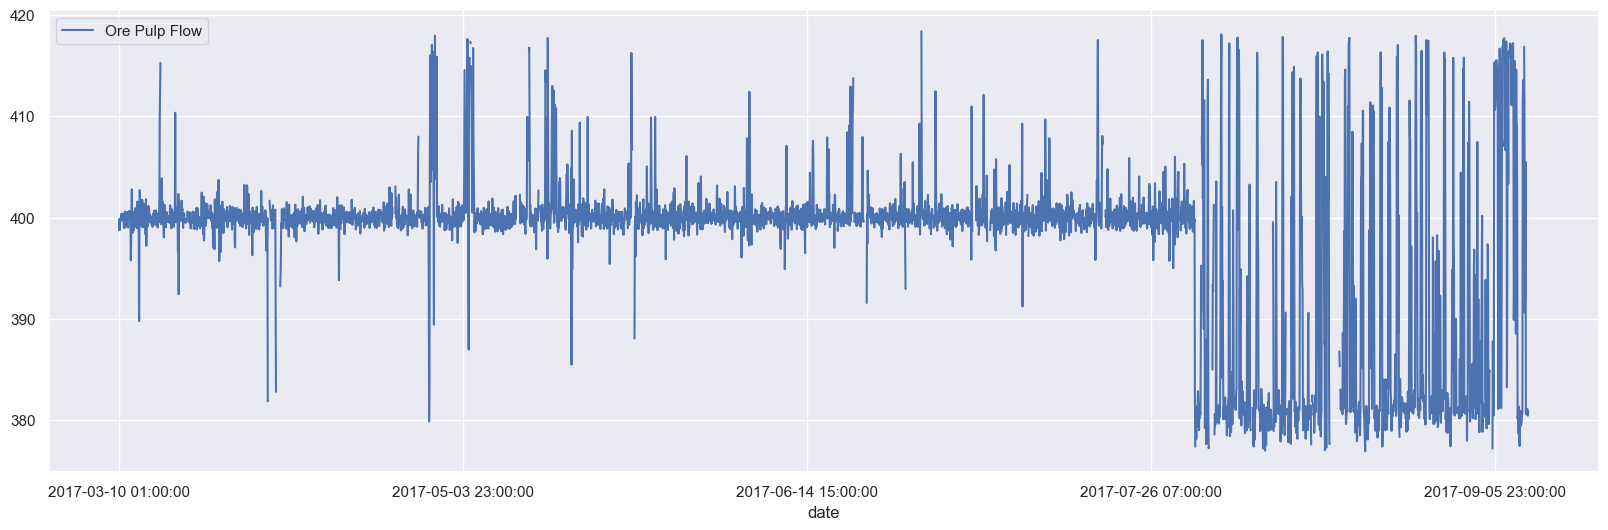

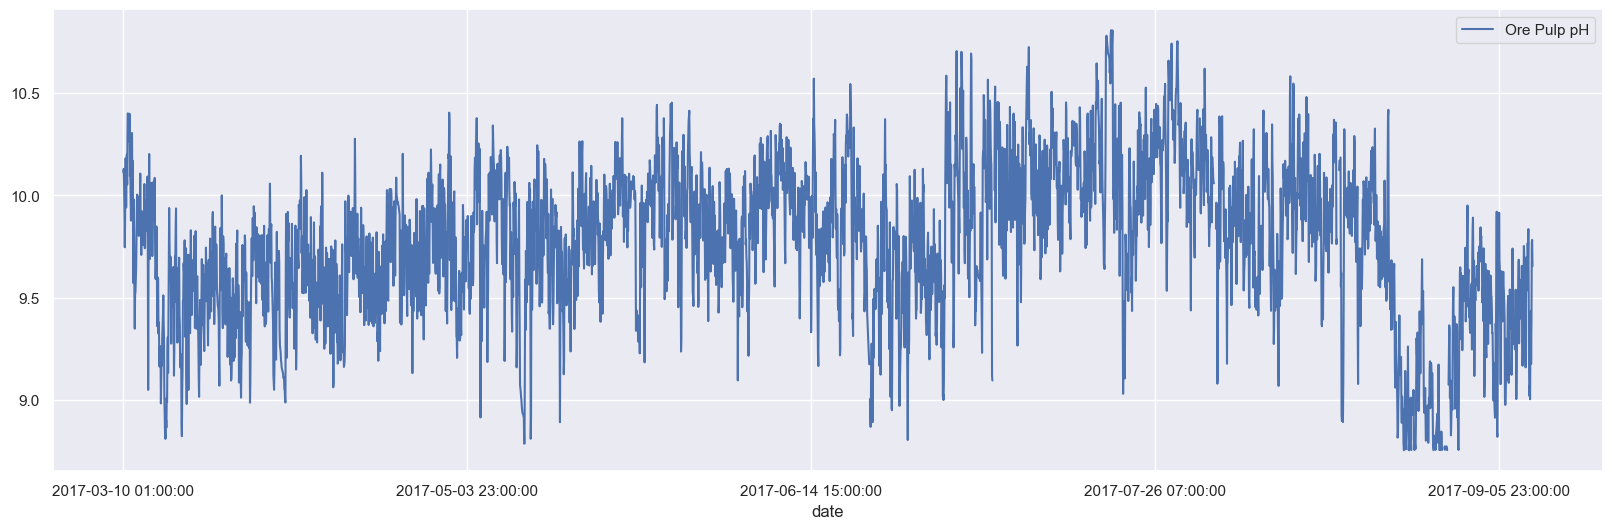

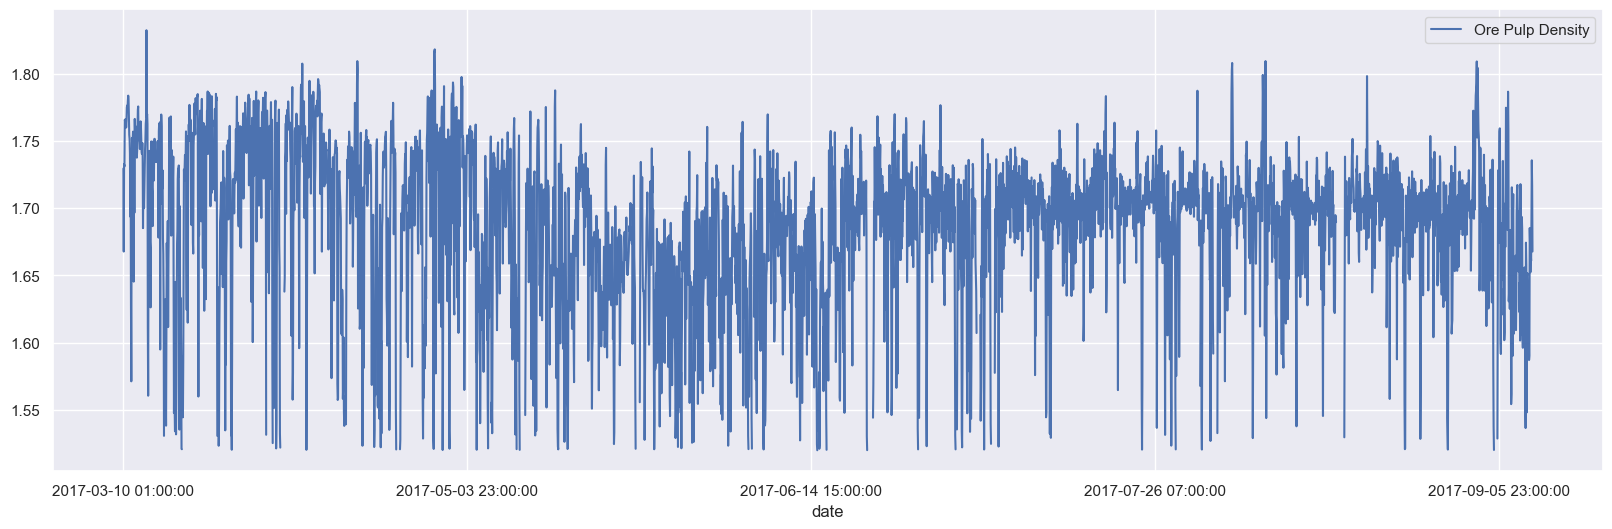

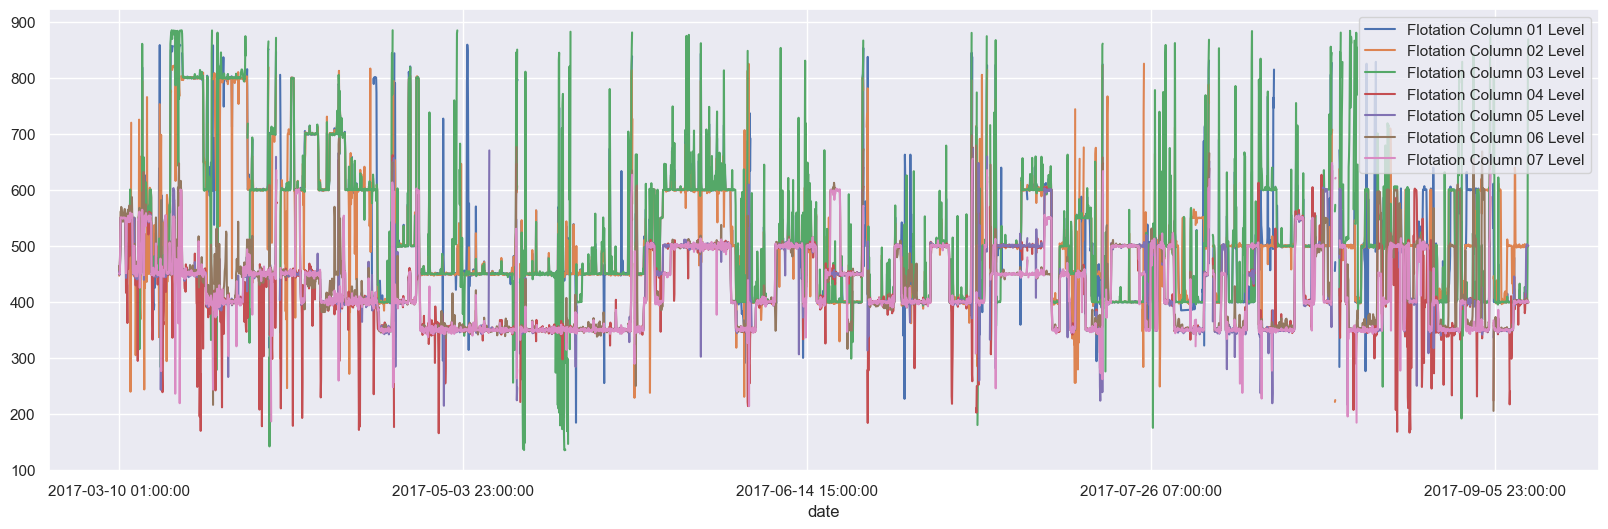

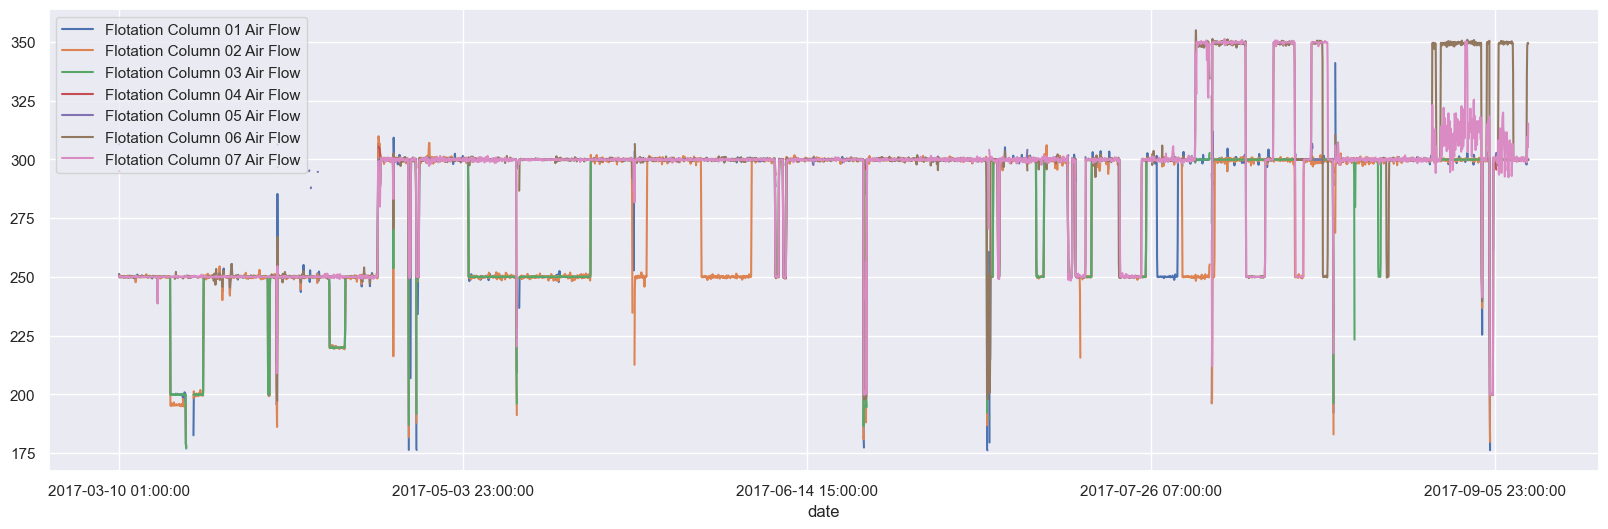

In [23]:
hourly_data[['% Iron Feed', '% Silica Feed', '% Iron Concentrate', '% Silica Concentrate']].plot()
hourly_data[['Starch Flow', 'Amina Flow']].plot()
hourly_data[['Ore Pulp Flow']].plot()
hourly_data[['Ore Pulp pH']].plot()
hourly_data[['Ore Pulp Density']].plot()
hourly_data[[col for col in hourly_data.columns if 'Level' in col]].plot()
hourly_data[[col for col in hourly_data.columns if 'Air Flow' in col]].plot()

In [35]:
# Remove as linhas em que a variável objetivo é nan
model_data = hourly_data.copy()
model_data = model_data[model_data['% Silica Concentrate'].notna()]

# Seleção de variáveis para modelo

In [36]:
model_data['Previous % Silica Concentrate'] = model_data['% Silica Concentrate'].shift(1) # Criação de variável da concentração de sílica atrasada em 1h

<Axes: xlabel='% Silica Concentrate', ylabel='Previous % Silica Concentrate'>

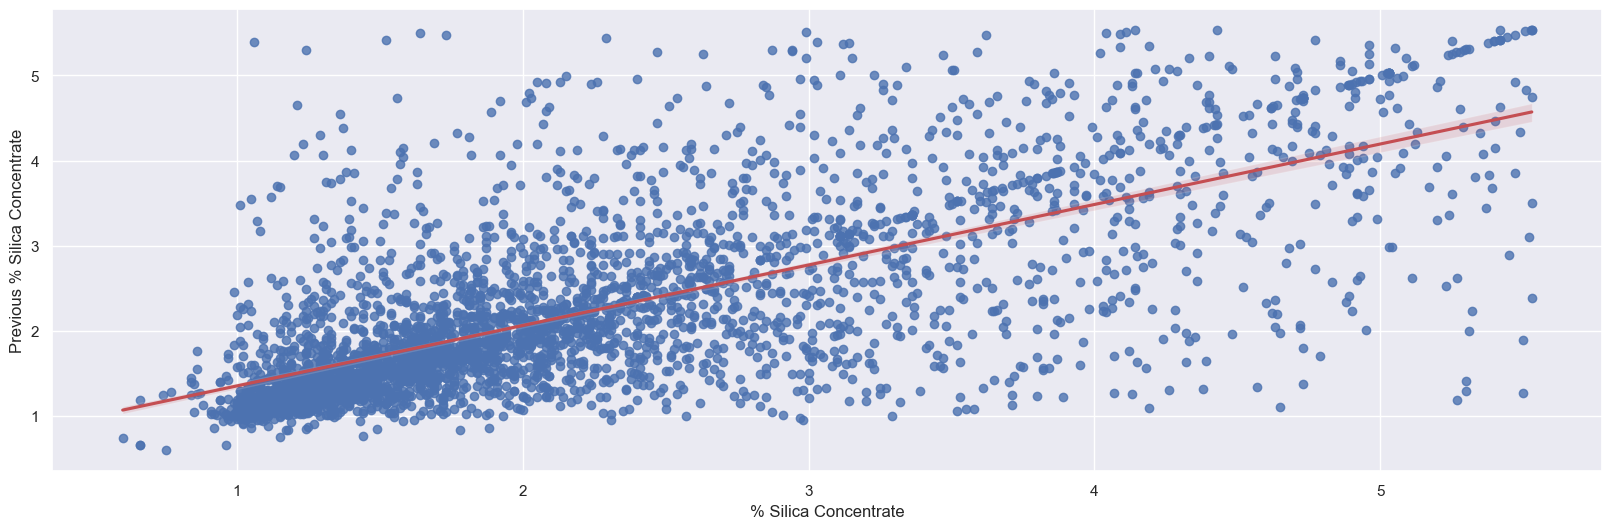

In [37]:
sns.regplot(model_data, x = '% Silica Concentrate', y = 'Previous % Silica Concentrate', line_kws = {'color' : 'r'}) # Avalia autocorrelação da concentração de sílica

<Axes: >

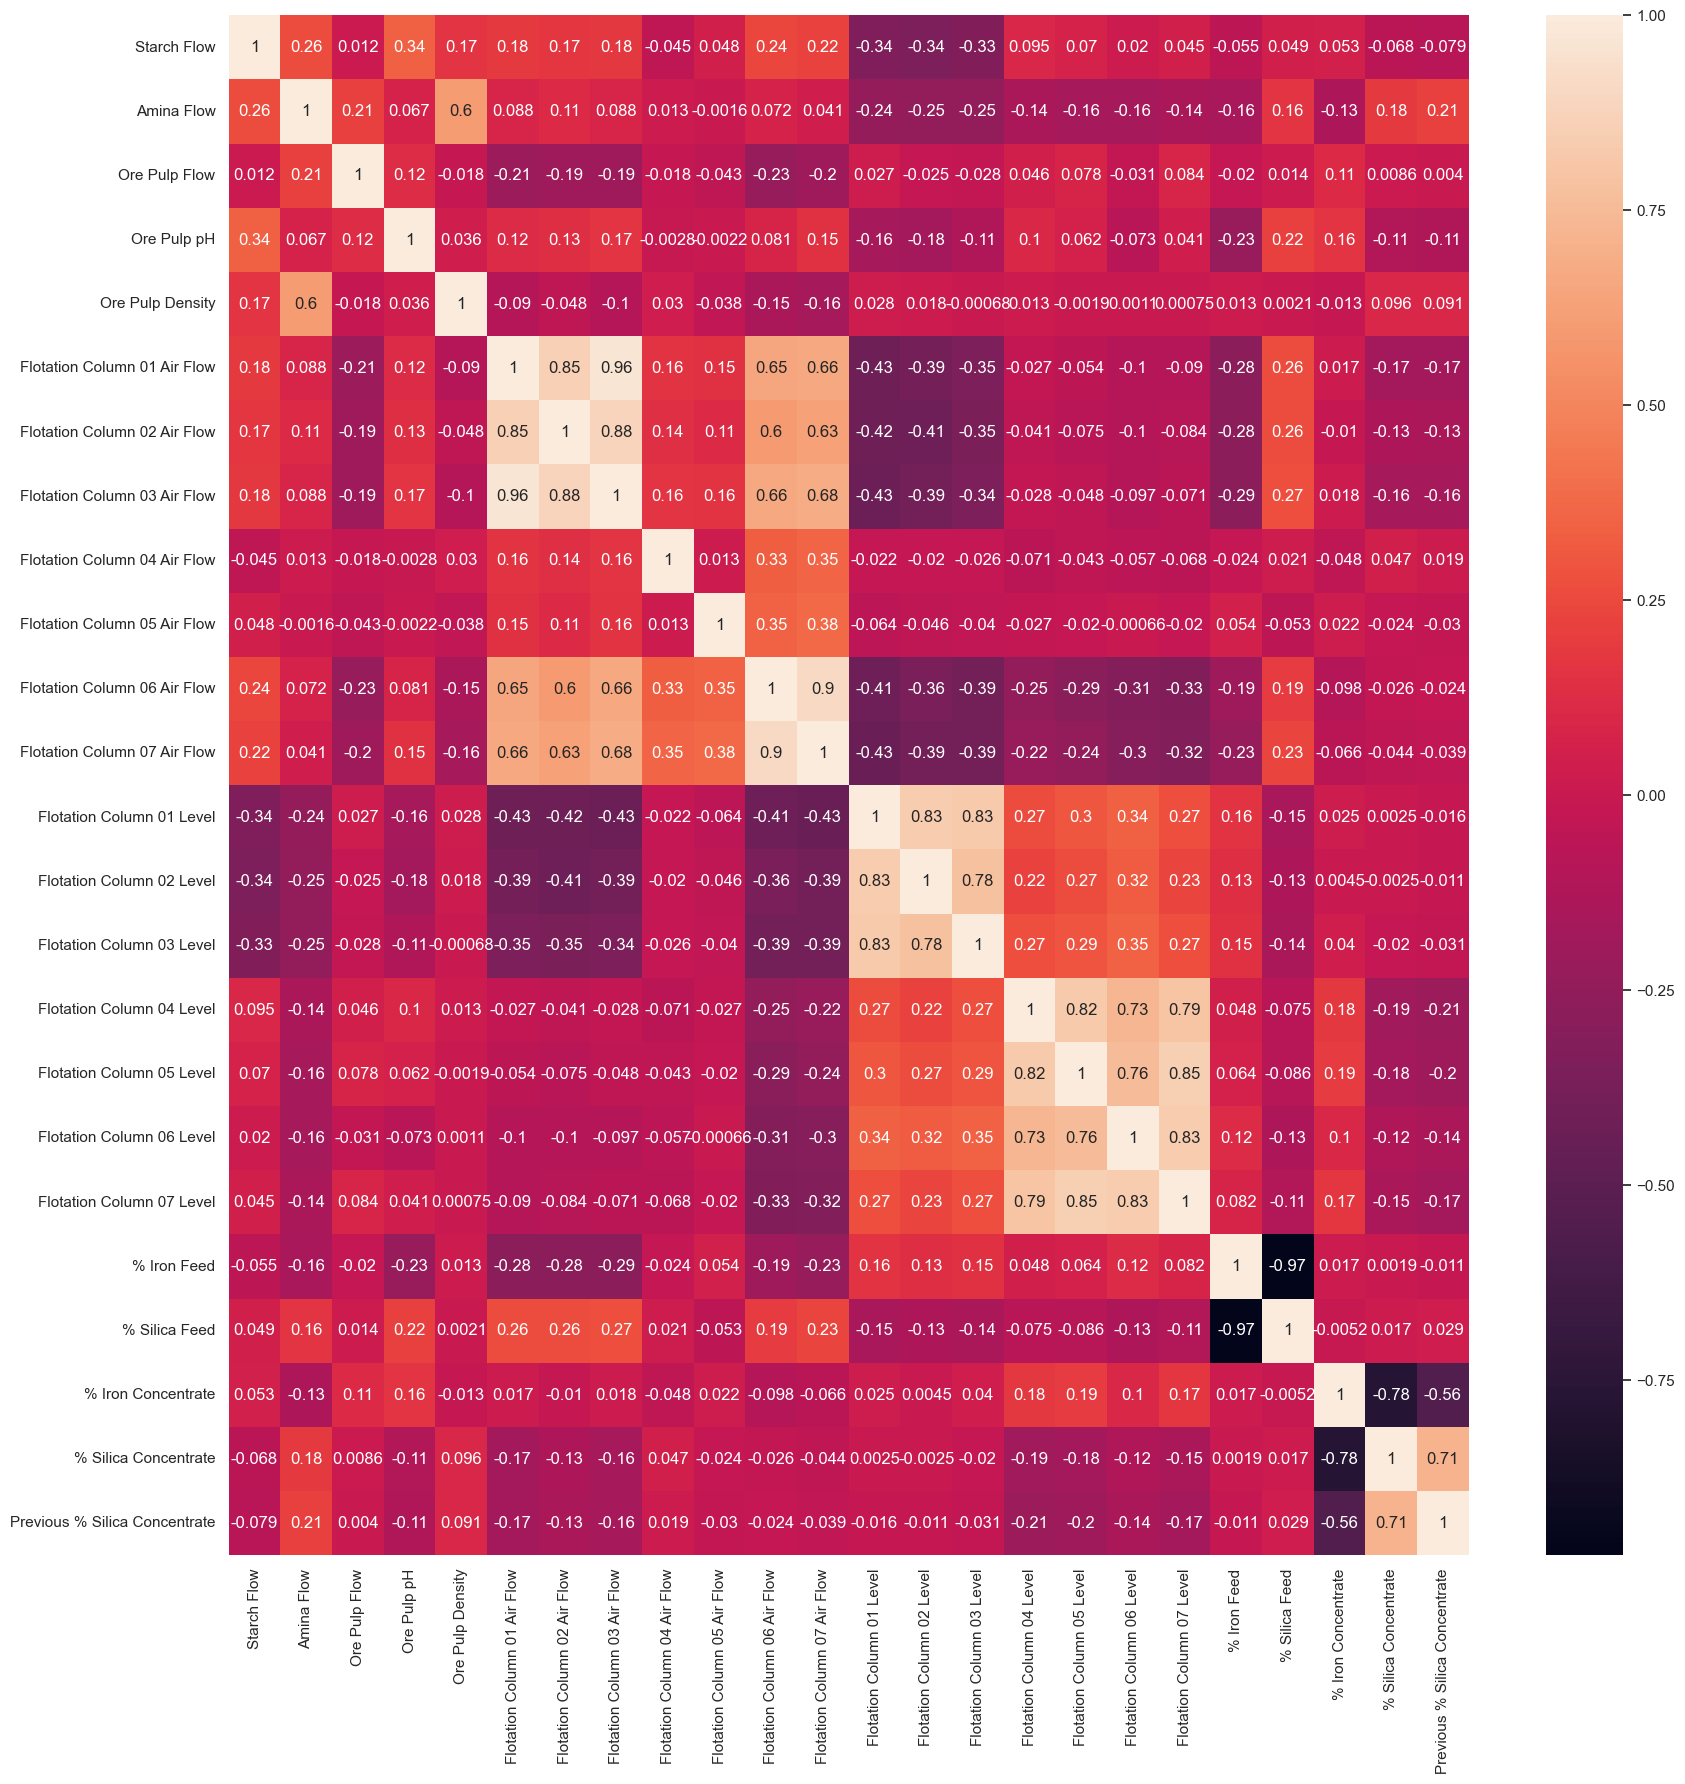

In [38]:
# Avaliação da correlação entre todas as variáveis
plt.figure(figsize = (20, 20))
sns.heatmap(model_data.corr(), annot = True)

# Preparação e treino do modelo

In [39]:
selected_features = model_data.columns.drop('% Silica Concentrate')

y = model_data['% Silica Concentrate'] # Seleção de variável dependente
X = model_data[selected_features] # Seleção de variáveis independentes

In [40]:
# Determinação da quantidade de linhas da amostra de treino, considerando 80% do total
total_sample_size = model_data.shape[0]
train_size = round(total_sample_size*0.8)
train_size

2946

In [41]:
# Separação das amostras de treino e teste
X_train = X.iloc[0:train_size]
X_test = X.iloc[train_size:]

y_train = y.iloc[0:train_size]
y_test = y.iloc[train_size:]

In [42]:
model = RandomForestRegressor(n_estimators = 100, max_depth = 5, random_state = 1)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=1)

In [43]:
prediction = model.predict(X_test)
y_prediction = pd.Series(prediction, index = y_test.index)

<Axes: xlabel='date'>

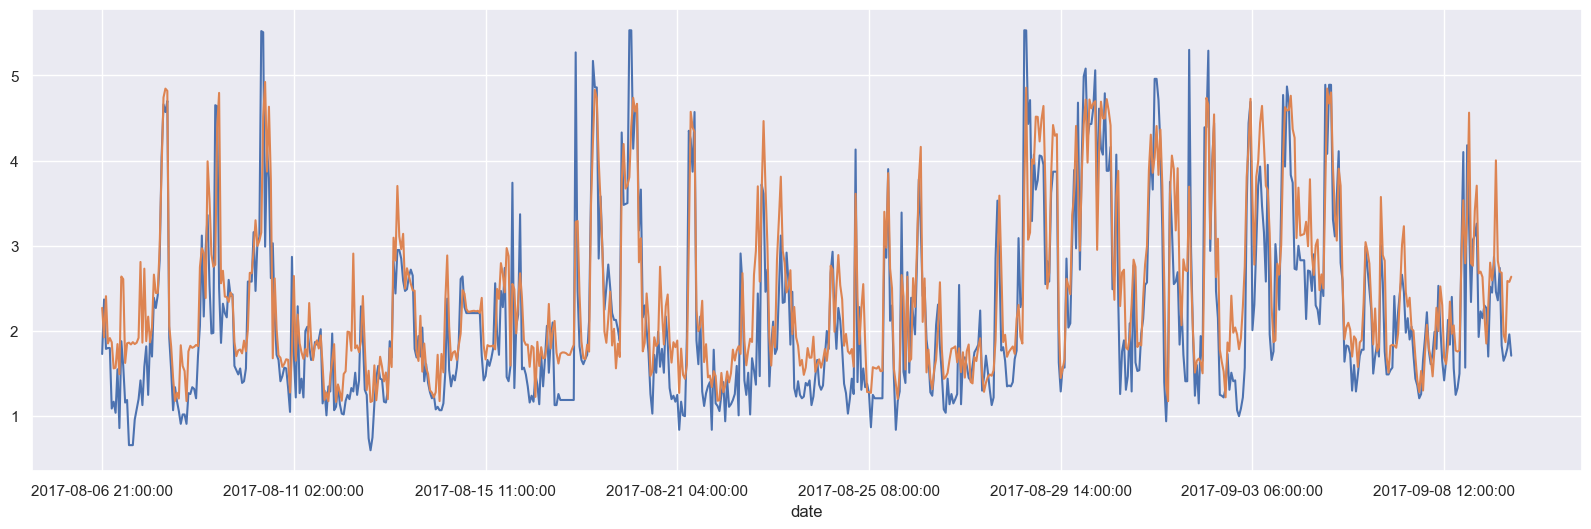

In [44]:
y_test.plot()
y_prediction.plot()